In [1]:
from skimage import io, color, transform, filters
import matplotlib.pyplot as plt
import numpy as np

In [14]:
def create_gaussian_pyramid(image, sigma, max_layers):
    pyramid = transform.pyramid_gaussian(image, sigma=sigma)
    return [next(pyramid) for _ in range(max_layers)]

In [20]:
def visualize_pyramids(pyramids, title):
    n = len(pyramids)
    fig, axes = plt.subplots(1, n, figsize=(5 * n, 5))
    if n == 1:
        axes = [axes]  # Make it iterable even if there's only one subplot
    for i, layer in enumerate(pyramids):
        ax = axes[i]
        ax.imshow(layer, cmap='gray')
        ax.set_title(f"{title} Layer {i+1}")
        ax.axis('off')
    plt.show()   

In [4]:
def calculate_contrast_pyramids(center_pyramid, surround_pyramid):
    on_off = [np.clip(c - s, 0, 1) for c, s in zip(center_pyramid, surround_pyramid)]
    off_on = [np.clip(s - c, 0, 1) for c, s in zip(center_pyramid, surround_pyramid)]
    return on_off, off_on

In [18]:
def upsample_and_average(pyramids, reference_shape):
    upsampled = [transform.resize(layer, reference_shape, mode='reflect') for layer in pyramids[1:]]
    upsampled.insert(0, pyramids[0])  # include the base layer without resizing
    return np.mean(upsampled, axis=0)

In [ ]:
# Load and convert the image
image_path = 'visual_attention.png'
image = io.imread(image_path)

if image.shape[-1] == 4:
    image = image[..., :3]

image = color.rgb2gray(image)

(-0.5, 795.5, 595.5, -0.5)

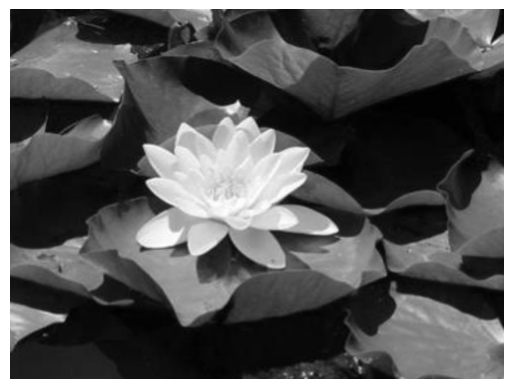

In [9]:
plt.imshow(image, cmap='gray')
plt.axis('off')

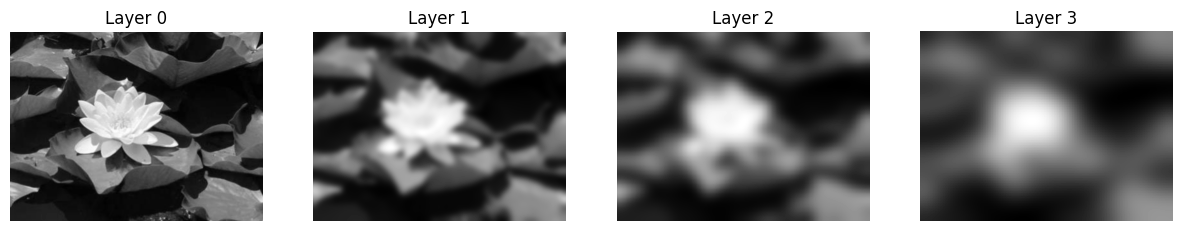

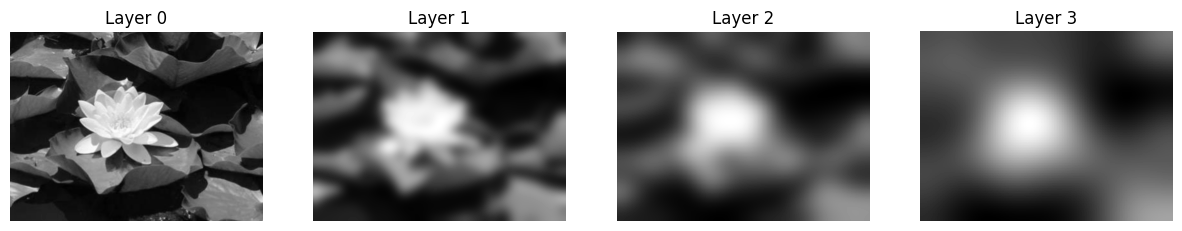

In [15]:
# Create pyramids
center_pyramid = create_gaussian_pyramid(image, max_layers=4, sigma=9)
surround_pyramid = create_gaussian_pyramid(image, max_layers=4, sigma=16)

# Visualize pyramids
visualize_pyramids(center_pyramid, 'Center Pyramid')
visualize_pyramids(surround_pyramid, 'Surround Pyramid')


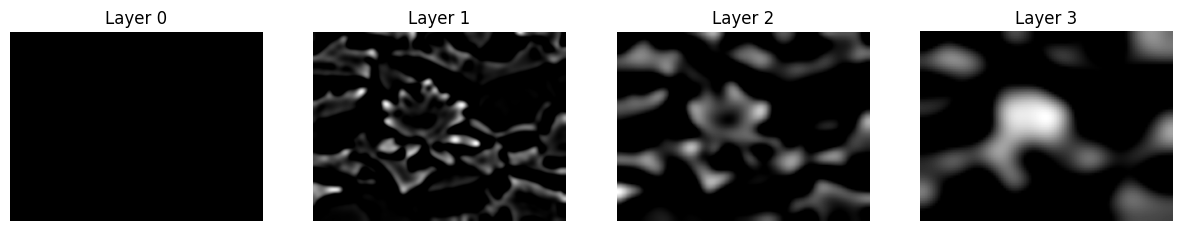

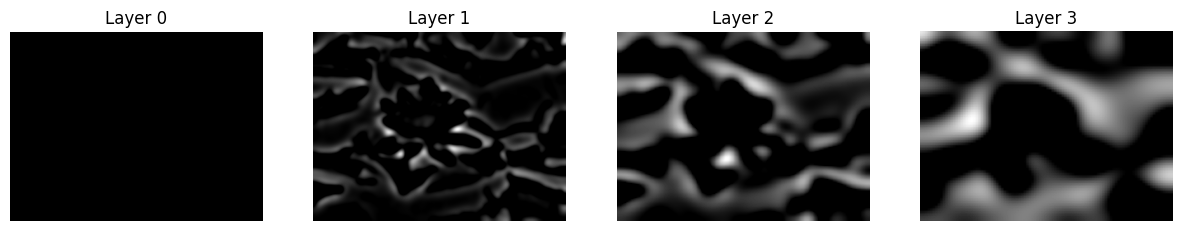

In [16]:
# Calculate and visualize contrast pyramids
on_off_pyramid, off_on_pyramid = calculate_contrast_pyramids(center_pyramid, surround_pyramid)
visualize_pyramids(on_off_pyramid, 'On-Off Contrast Pyramid')
visualize_pyramids(off_on_pyramid, 'Off-On Contrast Pyramid')

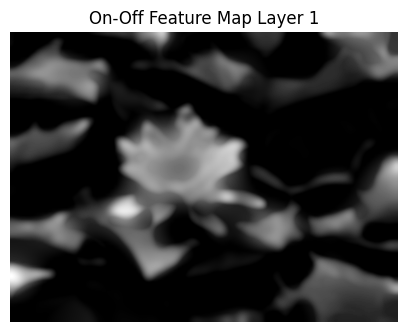

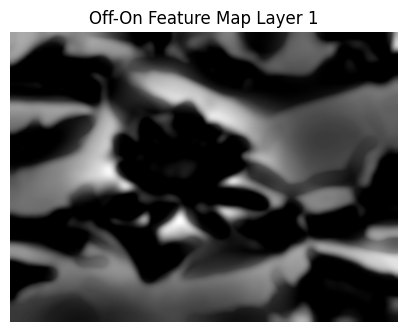

In [21]:
# Upsample, average, and visualize feature maps
on_off_feature_map = upsample_and_average(on_off_pyramid, center_pyramid[0].shape)
off_on_feature_map = upsample_and_average(off_on_pyramid, center_pyramid[0].shape)
visualize_pyramids([on_off_feature_map], 'On-Off Feature Map')
visualize_pyramids([off_on_feature_map], 'Off-On Feature Map')

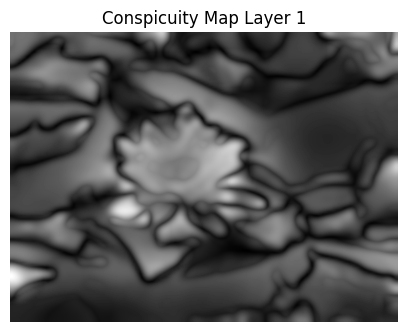

In [23]:
# Calculate and visualize the conspicuity map
conspicuity_map = np.mean([on_off_feature_map, off_on_feature_map], axis=0)
visualize_pyramids([conspicuity_map], 'Conspicuity Map')